In [107]:
import pandas as pd
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
df = pd.read_json('Dataset.json')
new_df = json_normalize(df['req']) 


df['fresh'] = new_df['fresh']
df['secure'] = new_df['secure']
df['stale'] = new_df['stale']
df['xhr'] = new_df['xhr']

#df.head()
new_df.head()

,baseUrl,fresh,hostname,ip,ips,originalUrl,path,protocol,secure,stale,...,body.note.desc,headers.host,headers.user-agent,headers.content-type,headers.org_id,headers.user_session_id,headers.accept,headers.content-length,headers.user.name,headers.user.role
0,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,...,Top recognize eat. Fact whom spend area thing ...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
1,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,...,As possible American many prepare four strong....,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
2,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,...,Tuesday Notes or 2 like 2 XSP Class,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
3,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,...,State third represent energy campaign not forg...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1
4,/crm/note,False,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,...,Us enjoy since. Time identify image position o...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1


In [109]:
def convert_to_binary(list_of_data, column_name):
    for index, value in enumerate(list_of_data):
        if value == True:
            new_df.loc[index,column_name] = 1    #everything is added in new_df dataframe
        else:
            new_df.loc[index,column_name] = 0

#Converting all boolean values to binary 
convert_to_binary(df['isSafe'],'isSafe')
convert_to_binary(df['fresh'],'fresh')
convert_to_binary(df['secure'],'secure')
convert_to_binary(df['stale'],'stale')
convert_to_binary(df['xhr'],'xhr')

#new_df['isSafe'] = df['isSafe']
new_df.head()

,baseUrl,fresh,hostname,ip,ips,originalUrl,path,protocol,secure,stale,...,headers.host,headers.user-agent,headers.content-type,headers.org_id,headers.user_session_id,headers.accept,headers.content-length,headers.user.name,headers.user.role,isSafe
0,/crm/note,0,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,0,1,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,1.0
1,/crm/note,0,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,0,1,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,1.0
2,/crm/note,0,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,0,1,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,0.0
3,/crm/note,0,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,0,1,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,1.0
4,/crm/note,0,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,0,1,...,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,70,sam,sales1,0.0


In [110]:
#Checking correlation between variables
new_df.corr()

,isSafe
isSafe,1.0


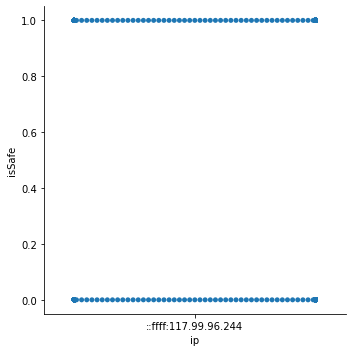

In [111]:
#Data Visualization of ip to issafe variable
sns.catplot(x="ip", y="isSafe" , hue="ip", data=new_df, kind="swarm")

In [112]:
dataset = new_df[["body.note.title", "body.note.desc","isSafe"]]
dataset.head()

,body.note.title,body.note.desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,1.0
1,Clayton Cooper,As possible American many prepare four strong....,1.0
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,0.0
3,Laura Fisher,State third represent energy campaign not forg...,1.0
4,Tyler Santos,Us enjoy since. Time identify image position o...,0.0


In [113]:
#Converting object datatype to category datatype
col_list = ['baseUrl', 'fresh','hostname','ip','originalUrl', 'path', 'protocol', 'secure', 'stale', 'xhr', 'headers.host', 'headers.user-agent', 'headers.content-type', 'headers.org_id', 'headers.user_session_id', 'headers.accept', 'headers.content-length', 'headers.user.name', 'headers.user.role']

for col in col_list:
    new_df[col] = new_df[col].astype('category')
    dataset[col] = new_df[col].cat.codes

#new_df.dtypes
#dataset.head()
print((dataset == 0).all()) #Checking how many columns have 0 as row value. Only body desc, isSafe and title are False

body.note.title            False
body.note.desc             False
isSafe                     False
baseUrl                     True
fresh                       True
hostname                    True
ip                          True
originalUrl                 True
path                        True
protocol                    True
secure                      True
stale                       True
xhr                         True
headers.host                True
headers.user-agent          True
headers.content-type        True
headers.org_id              True
headers.user_session_id     True
headers.accept              True
headers.content-length      True
headers.user.name           True
headers.user.role           True
dtype: bool


In [114]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(dataset["body.note.desc"])
X_train_counts.shape

(1000, 1003)

In [115]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1000, 1003)

In [116]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn import model_selection, naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, dataset["isSafe"])

#data = pd.DataFrame(dataset[['new_body.note.title','baseUrl', 'fresh','hostname','ip','originalUrl', 'path', 'protocol', 'secure', 'stale', 'xhr', 'headers.host', 'headers.user-agent', 'headers.content-type', 'headers.org_id', 'headers.user_session_id', 'headers.accept', 'headers.content-length', 'headers.user.name', 'headers.user.role']]).to_numpy()
#[['new_body.note.title','baseUrl', 'fresh','hostname','ip','originalUrl', 'path', 'protocol', 'secure', 'stale', 'xhr', 'headers.host', 'headers.user-agent', 'headers.content-type', 'headers.org_id', 'headers.user_session_id', 'headers.accept', 'headers.content-length', 'headers.user.name', 'headers.user.role']]
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(dataset["body.note.desc"], dataset["isSafe"],test_size=0.3,random_state=42)

In [100]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(Train_X,Train_Y)

# Performance of NB Classifier
predicted = text_clf.predict(Test_X)
np.mean(predicted == Test_Y)

0.8333333333333334

In [117]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(Train_X,Train_Y)
predicted_svm = text_clf_svm.predict(Test_X)
np.mean(predicted_svm == Test_Y)

0.82

In [ ]:
#Multinomial NB gives better predicted value performance than SVM